In [1]:
#Image Classification Using Convolutional Neural Network (CNN)

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets,layers,models

In [3]:
(a_train,b_train),(a_test,b_test)=datasets.cifar10.load_data()#load data sets

In [4]:
a_train.shape

(50000, 32, 32, 3)

In [5]:
a_test.shape

(10000, 32, 32, 3)

In [6]:
b_train.shape

(50000, 1)

In [7]:
b_test.shape

(10000, 1)

In [8]:
b_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

b_train is in 2d array convet it to 1d

In [9]:
b_train=a_train.reshape(-1,)

In [10]:
b_test=b_test.reshape(-1,)

In [11]:
a_train[0:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [12]:
b_train[0:5]

array([59, 62, 63, 43, 46], dtype=uint8)

In [13]:
a_train = a_train / 255.0  # Normalize images to [0, 1]
a_test = a_test / 255.0
b_train = b_train.flatten()  # Shape: [50000]
b_test = b_test.flatten()

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [15]:
def plot_samp(a, b, index):
    plt.figure(figsize=(15,2))
    plt.imshow(a[index])


    plt.show()



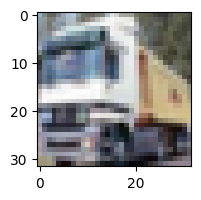

In [16]:
plot_samp(a_train,b_train, 1)

In [17]:
classes[0]

'airplane'

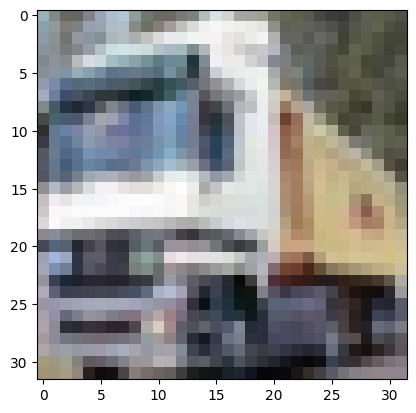

In [18]:
plt.imshow(a_train[1])

In [19]:
b_train[1]

np.uint8(62)

In [20]:
#model building

In [21]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
#cnn.fit(a_train,b_train,epochs=10)

In [25]:
b_pred=cnn.predict(a_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [29]:
cnn.evaluate(a_test,b_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1034 - loss: 2.3143


[2.3158116340637207, 0.10119999945163727]

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [34]:
'data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)''

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-34-79226bc7a705>, line 1)

In [ ]:
cnn = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Add dropout to prevent overfitting
    layers.Dense(10, activation='softmax')
])

# Compile and train
cnn.compile(optimizer=keras.optimizers.Adam(clipnorm=1.0),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy', layers.Precision(), layers.Recall()])
cnn.fit(a_train, b_train, epochs=20)

fit model